# Objective: Analyzing Nutritional Content and Identifying Healthy Cereals

1. Exploratory Data Analysis (EDA):

Explore the dataset to understand its structure, features, and basic statistics.
Identify any missing or inconsistent data and handle it appropriately.

2. Nutrient Analysis:

Investigate the distribution of key nutrients (protein, fat, fiber) in the cereals.
Examine the average nutrient content produced by different manufacturers.
Identify manufacturers that tend to produce cereals with higher or lower levels of specific nutrients.

3. Healthy Cereal Criteria:

Establish criteria for what constitutes a "healthy" cereal based on nutritional levels.
Define thresholds for protein, fat, and fiber that align with a balanced and nutritious diet.

4. Filtering the Best Cereal:

Implement a filtering mechanism to identify cereals that meet the defined healthy criteria.
Create a list or visual representation of the top cereals based on nutritional content.

5. Linear Regression Analysis:

Explore the relationship between selected nutrients (e.g., protein, fat, fiber) and caloric content using linear regression.
Evaluate the model's performance and interpret feature importance.

6. Insights and Recommendations:

Summarize key insights gained from the analysis.
Provide recommendations for consumers seeking cereals with specific nutritional characteristics.

7. Visualization:

Create visualizations (e.g., bar charts, line plots) to enhance the presentation of key findings.
Include visual representations of nutrient levels across different manufacturers.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [111]:
df = pd.read_csv(r"C:\Users\user\Downloads\archive\cereal.csv")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


# Data Cleaning

In [112]:
#Renaming the column
df.columns = ['Name', 'Manufacturer', 'Type', 'Calories',
              'Protein', 'Fat', 'Sodium',
              'Fiber', 'Carbohydrates', 'Sugars',
              'Potassium', 'Vitamins', 'Shelf_location',
              'net_weight', 'Serving', 'Rating']

In [113]:
""""mfr: Manufacturer of cereal
A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats"""

df['Manufacturer'] = df['Manufacturer'].map({'N': 'Nabisco', 'G': 'General Mills',
                                             'R': 'Ralston Purina', 'Q': 'Quaker Oats',
                                             'K': 'Kelloggs'}).fillna('American Home Food Products')
    

In [114]:
df['Type'] = df['Type'].map({'C': 'Cold', 'H': 'Hot'})

In [115]:
df

,Name,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf_location,net_weight,Serving,Rating
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,Cold,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,General Mills,Cold,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,General Mills,Cold,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,Ralston Purina,Cold,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,General Mills,Cold,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [116]:
df.isna().sum()

Name              0
Manufacturer      0
Type              0
Calories          0
Protein           0
Fat               0
Sodium            0
Fiber             0
Carbohydrates     0
Sugars            0
Potassium         0
Vitamins          0
Shelf_location    0
net_weight        0
Serving           0
Rating            0
dtype: int64

In [117]:
describtive_statistics = df.describe()
describtive_statistics

,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf_location,net_weight,Serving,Rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


# Exploratory Data Analysis

In [64]:
df.Type.value_counts()

Type
Cold    74
Hot      3
Name: count, dtype: int64

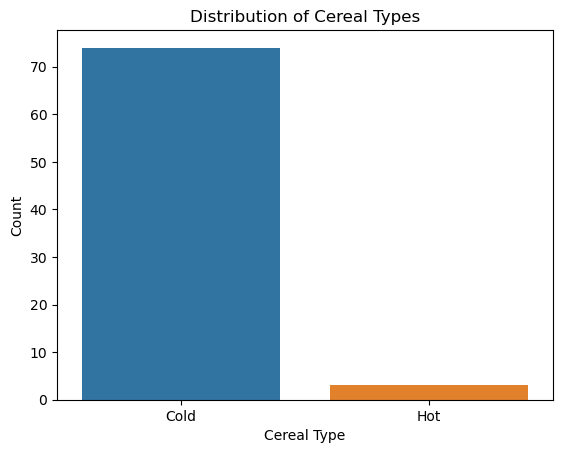

In [65]:
plt.figsize = (10, 6)

sns.countplot(data = df,
          x = 'Type')
plt.title('Distribution of Cereal Types')
plt.xlabel('Cereal Type')
plt.ylabel('Count')
plt.show()

In [99]:
manufacturer_counts = df['Manufacturer'].value_counts().reset_index()
manufacturer_counts.columns = ['Manufacturer', 'Count']

manufacturer_counts = manufacturer_counts.sort_values(by='Count', ascending=False)
manufacturer_counts

,Manufacturer,Count
0,Kelloggs,23
1,General Mills,22
2,American Home Food Products,10
3,Quaker Oats,8
4,Ralston Purina,8
5,Nabisco,6


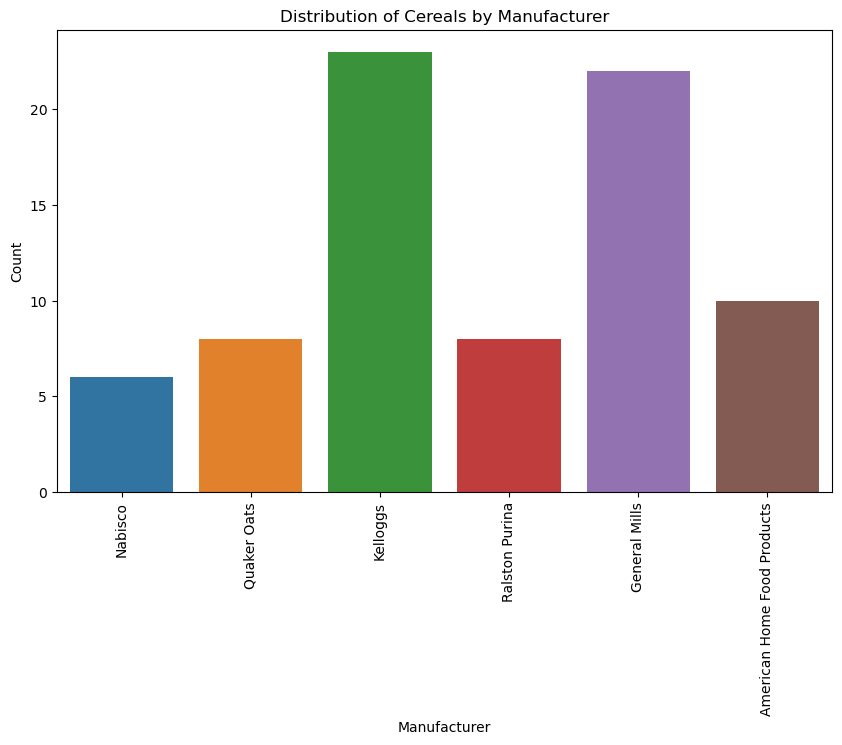

In [103]:
# Performing who is major manufacturer.

plt.figure(figsize=(10, 6))
sns.countplot(x='Manufacturer', data=df)
plt.title('Distribution of Cereals by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

1. Kelloggs and General Mills Dominate:

            Kelloggs and General Mills have the highest counts, indicating a significant presence of cereals from these                     manufacturers in the dataset.

# Top N Cereals

In [67]:
top_rated_cereals = df.nlargest(10, 'Rating')
top_10 = pd.DataFrame(top_rated_cereals[['Name', 'Rating', 'Manufacturer']])
top_10

,Name,Rating,Manufacturer
3,All-Bran with Extra Fiber,93.704912,Kelloggs
64,Shredded Wheat 'n'Bran,74.472949,Nabisco
65,Shredded Wheat spoon size,72.801787,Nabisco
0,100% Bran,68.402973,Nabisco
63,Shredded Wheat,68.235885,Nabisco
20,Cream of Wheat (Quick),64.533816,Nabisco
55,Puffed Wheat,63.005645,Quaker Oats
54,Puffed Rice,60.756112,Quaker Oats
50,Nutri-grain Wheat,59.642837,Kelloggs
2,All-Bran,59.425505,Kelloggs


<Axes: xlabel='Name'>

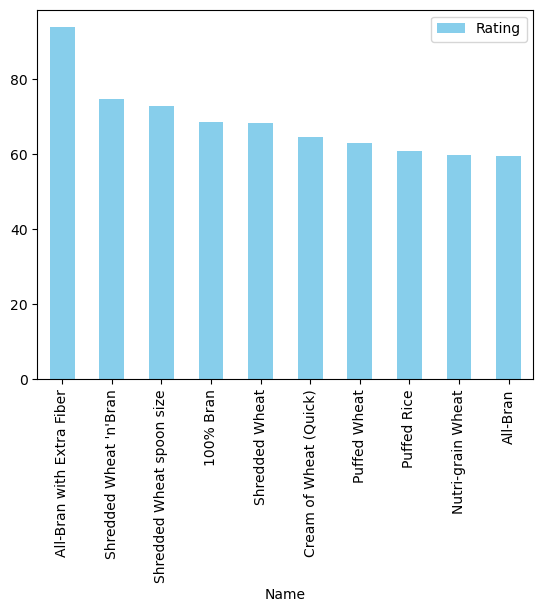

In [72]:
top_10.set_index('Name').plot(kind = 'bar', color = 'skyblue')

1. The 'top_10' DataFrame provides a list of cereals that are rated the highest among all entries in the dataset.
2. Consumers may find these top-rated cereals particularly appealing, indicating their popularity or positive reception.
3. All-Bran with Extra Fiber is the only cereal which have rating above 90.

# Calory Distribution

Text(0.5, 1.0, 'CALORIES DISTRIBUTION')

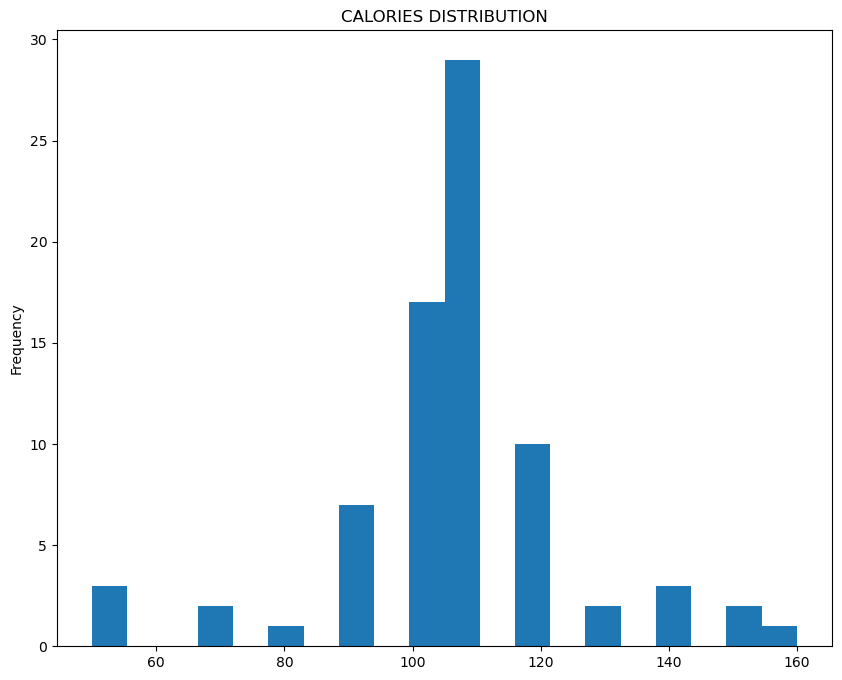

In [80]:
plt.figure(figsize = (10, 8))
df['Calories'].plot(kind = 'hist', bins = 20
       )
plt.title('CALORIES DISTRIBUTION')

# How Calories impact on Rating

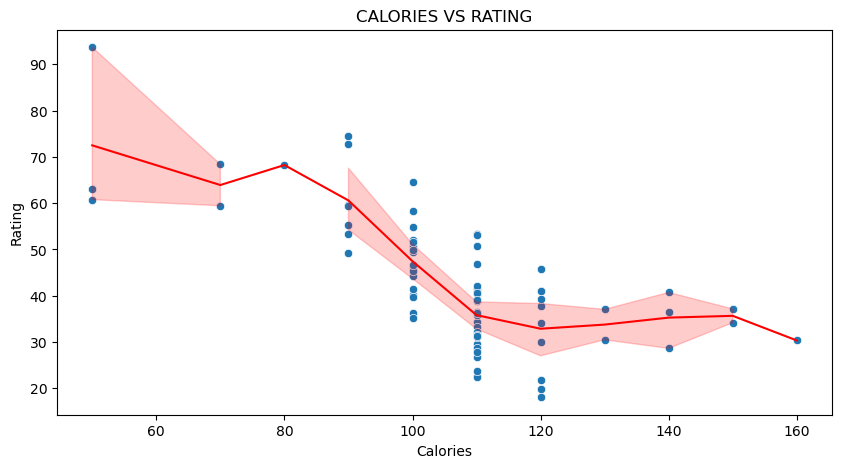

In [30]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df,
               x = 'Calories',
               y = 'Rating')
sns.lineplot(data=df, x="Calories", y="Rating", color="red")
plt.title("CALORIES VS RATING")
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show()

# How protein impact on Rating

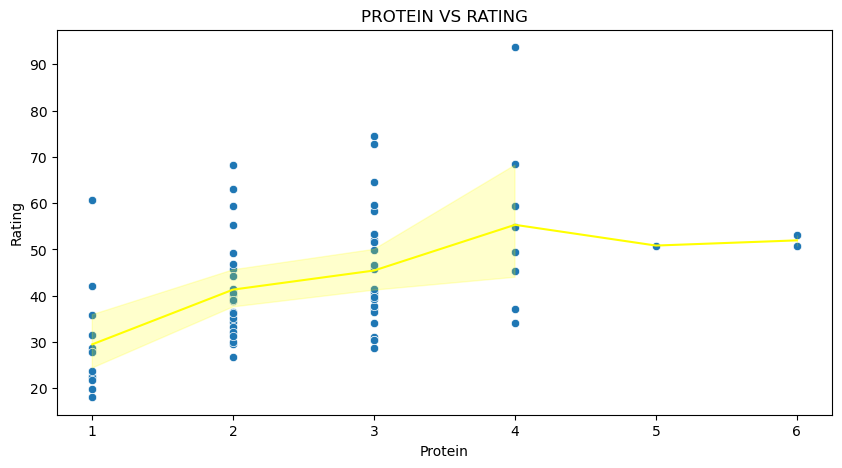

In [31]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df,
               x = 'Protein',
               y = 'Rating')
sns.lineplot(data = df,
            x = 'Protein',
            y = 'Rating',
            color = 'yellow')
plt.title("PROTEIN VS RATING")
plt.xlabel('Protein')
plt.ylabel('Rating')
plt.show()

# How fat content impact on rating

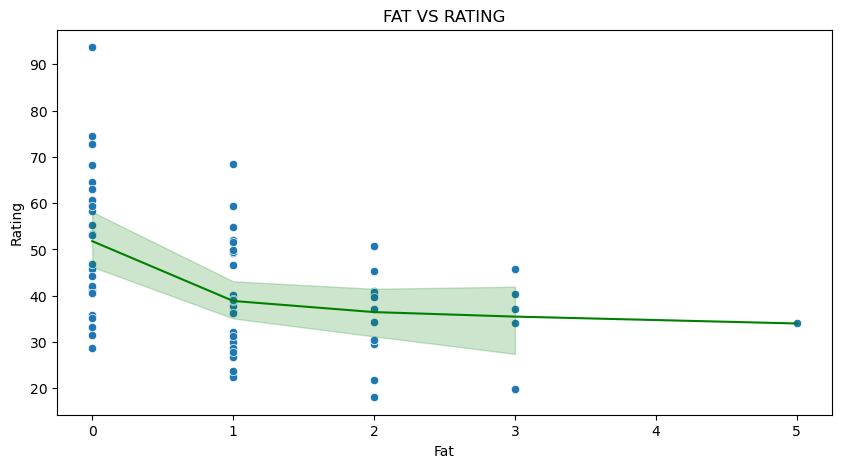

In [32]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df,
               x = 'Fat',
               y = 'Rating')
sns.lineplot(data = df,
            x = 'Fat',
            y = 'Rating',
            color = 'green')
plt.title("FAT VS RATING")
plt.xlabel('Fat')
plt.ylabel('Rating')
plt.show()

# How does Vitamin impact on Rating

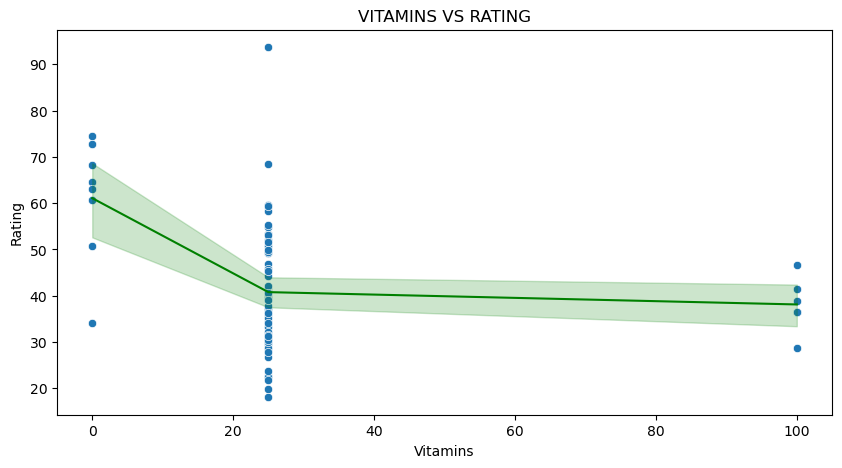

In [109]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df,
               x = 'Vitamins',
               y = 'Rating')
sns.lineplot(data = df,
            x = 'Vitamins',
            y = 'Rating',
            color = 'green')
plt.title("VITAMINS VS RATING")
plt.xlabel('Vitamins')
plt.ylabel('Rating')
plt.show()

# How Sugars impact on product Rating

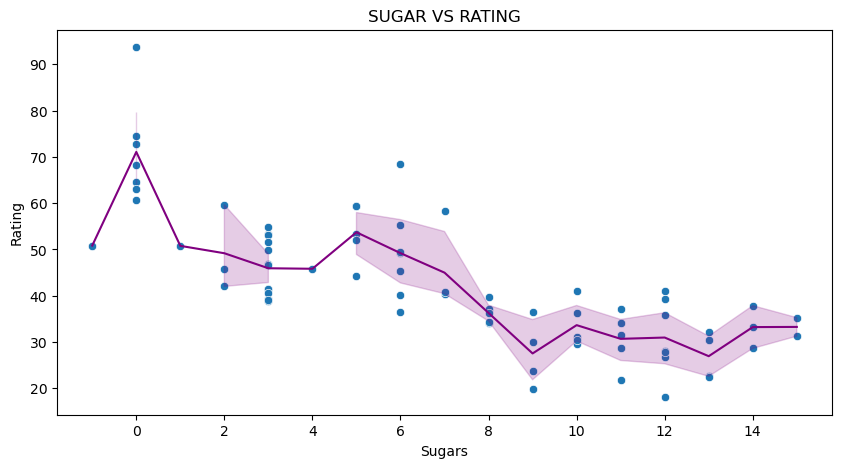

In [34]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df,
               x = 'Sugars',
               y = 'Rating')
sns.lineplot(data = df,
            x = 'Sugars',
            y = 'Rating',
            color = 'purple')
plt.title("SUGAR VS RATING")
plt.xlabel('Sugars')
plt.ylabel('Rating')
plt.show()

In [35]:
nutrients_to_average = ['Protein', 'Fat', 'Vitamins', 'Fiber', 'Rating']
average_nutrient_by_manufacturer = df.groupby('Manufacturer')[nutrients_to_average].mean()
average_nutrient_by_manufacturer

,Protein,Fat,Vitamins,Fiber,Rating
Manufacturer,,,,,
American Home Food Products,2.600000,0.900000,25.000000,2.500000,43.020261
General Mills,2.318182,1.363636,35.227273,1.272727,34.485852
Kelloggs,2.652174,0.608696,34.782609,2.739130,44.038462
Nabisco,2.833333,0.166667,8.333333,4.000000,67.968567
Quaker Oats,2.625000,1.750000,12.500000,1.337500,42.915990
Ralston Purina,2.500000,1.250000,25.000000,1.875000,41.542997


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, 'Ralston Purina'),
  Text(0.0, 0, 'American Home Food Products'),
  Text(1.0, 0, 'General Mills'),
  Text(2.0, 0, 'Kelloggs'),
  Text(3.0, 0, 'Nabisco'),
  Text(4.0, 0, 'Quaker Oats'),
  Text(5.0, 0, 'Ralston Purina'),
  Text(6.0, 0, '')])

<Figure size 1000x300 with 0 Axes>

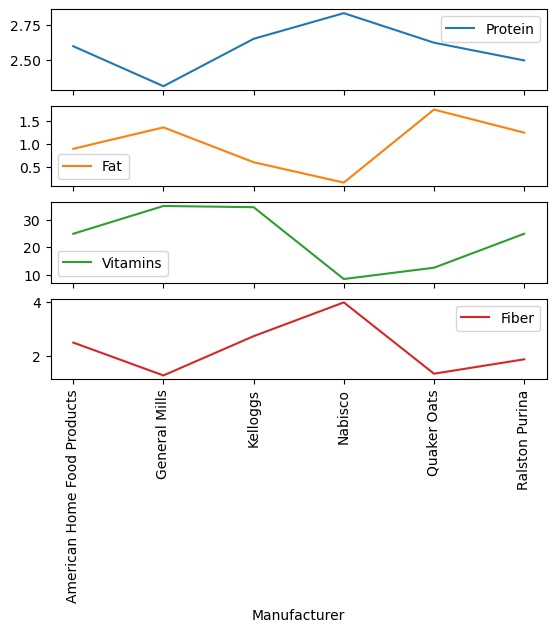

In [36]:
plt.figure(figsize = (10,3))
average_nutrient_by_manufacturer.plot(kind = 'line', 
                                      y = ['Protein', 'Fat', 'Vitamins', 'Fiber'],
                                     subplots = True)
plt.xticks(rotation = 90)

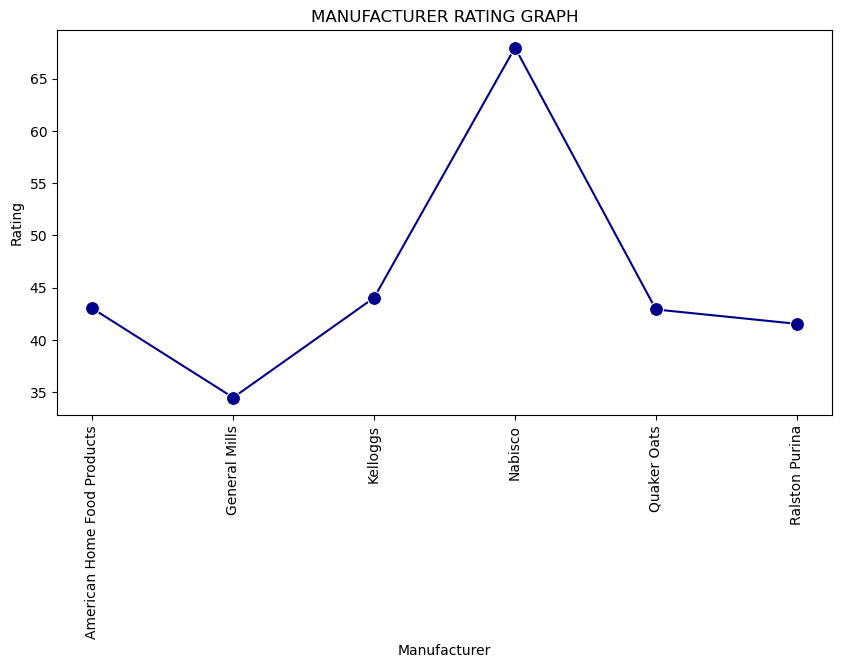

In [37]:
plt.figure(figsize = (10,5))
sns.lineplot(data = average_nutrient_by_manufacturer,
           x = 'Manufacturer',
           y = 'Rating',
            marker = 'o',
            markersize = 10,
            color = 'darkblue')
plt.title('MANUFACTURER RATING GRAPH')
plt.xticks(rotation = 90)
plt.show()

Nabisco has the highest rating among manufacturers.

In [38]:
filter_criteria = (
    (df['Calories'] < 100) &
    (df['Fat'] < 2) &
    (df['Sugars'] < 5) &
    (df['Fiber'] > 2) &
    (df['Protein'] > 2)
)

a = df[filter_criteria]

b = a[['Name', 'Calories', 'Fat', 'Sugars', 'Fiber', 'Protein', 'Rating', 'Manufacturer']]
best_cereals = pd.DataFrame(b)

In [23]:
best_cereals

,Name,Calories,Fat,Sugars,Fiber,Protein,Rating,Manufacturer
3,All-Bran with Extra Fiber,50,0,0,14.0,4,93.704912,Kelloggs
50,Nutri-grain Wheat,90,0,2,3.0,3,59.642837,Kelloggs
64,Shredded Wheat 'n'Bran,90,0,0,4.0,3,74.472949,Nabisco
65,Shredded Wheat spoon size,90,0,0,3.0,3,72.801787,Nabisco


# Meachine Learning

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Protein', 'Fat', 'Fiber']]
y = df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 178.26275052507216


In [105]:
r2 = model.score(X_test, y_test)
print(f'R-squared: {r2}')

R-squared: 0.4026797888165121


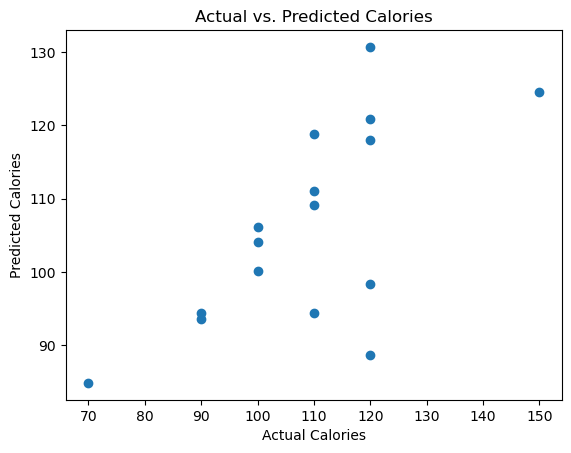

In [106]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs. Predicted Calories')
plt.show()

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
feature_importance = pd.Series(model.coef_, index=X.columns)
print('Feature Importance:')
print(feature_importance)

Feature Importance:
Protein    0.838222
Fat        9.813882
Fiber     -2.880321
dtype: float64


1. Protein: The positive coefficient (0.8382) suggests that an increase in protein content is associated with an increase in calorie content.

2. Fat: The relatively large positive coefficient (9.8139) indicates that fat content has a strong positive impact on the predicted calories. This suggests that fat contributes significantly to the overall caloric content of cereals.

3. Fiber: The negative coefficient (-2.8803) indicates that an increase in fiber content is associated with a decrease in calorie content. This suggests that fiber has a negative impact on the overall caloric content.